In [14]:
import parmed as pm
import networkx as nx
from pathlib import Path
import simtk.openmm.app as app
from IPython.display import SVG, display
import matplotlib.pyplot as plt


base = '../data/methylfuran/'
dummy_rtf = base + 'atom_definitions.rtf'
dummy_prm = base + 'parameters.prm'
psf_file_path = base + 'system_in_vac.psf'
crd_file_path = base + 'system_in_vac.crd'


In [43]:
def _generate_graph_from_psf(psf, dummy_index = []):

    G = nx.Graph()

    normal_node_color = 'g'
    dummy_node_color = 'r'
    charge_acceptor_color = 'b'
    charge_donor_color = 'r'

    for atom in psf.atoms:

        atom_name = atom.name
        atom_index = atom.idx
        atom_type = atom.type
        atomic_number = atom.atomic_number
        node_name = str(atom_index) + '-' + str(atom_name) + '-' + str(atom_type)
        
        if atom_index in dummy_index:
            color = dummy_node_color

        else:
            color = normal_node_color
        edge_color = color
        G.add_node(node_name, atom_name=atom_name, atom_index=atom_index, atom_type=atom_type, color=color, edge_color=edge_color, atomic_number=atomic_number)

    for bond in psf.bonds:
        a1 = bond.atom1
        a2 = bond.atom2

        atom_name_a1 = a1.name
        atom_index_a1 = a1.idx
        atom_type_a1 = a1.type
        
        node_name_a1 = str(atom_index_a1) + '-' + str(atom_name_a1) + '-' + str(atom_type_a1)
        
        atom_name_a2 = a2.name
        atom_index_a2 = a2.idx
        atom_type_a2 = a2.type

        node_name_a2 = str(atom_index_a2) + '-' + str(atom_name_a2) + '-' + str(atom_type_a2)
        
        G.add_edge(node_name_a1 , node_name_a2, atom_index_a1=atom_index_a1, atom_index_a2=atom_index_a2)

    edge_colors = []
    node_colors = []

    for node, data in G.nodes(data=True):
        edge_colors.append(data['edge_color'])
        node_colors.append(data['color'])


    return G, node_colors, edge_colors



In [26]:
for path in [dummy_rtf,dummy_prm,psf_file_path,crd_file_path]:
    file = Path(path)
    abs_path = file.resolve()
    
parameter_files = dummy_rtf, dummy_prm
parameter = pm.charmm.CharmmParameterSet(*parameter_files)
psf = pm.charmm.CharmmPsfFile(psf_file_path)
crd = pm.charmm.CharmmCrdFile(crd_file_path)
psf.positions = crd.positions

#system = psf.createSystem(parameter, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)


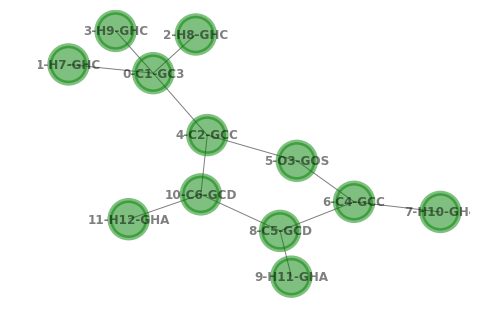

In [50]:

G, node_colors, edgecolors = _generate_graph_from_psf(psf)
nx.draw(G, with_labels=True, font_weight='bold', edgecolors=edgecolors, node_color=node_colors, node_size=1400, alpha=0.5, font_size=12, linewidths=5)
plt.show()



# Terminal junction between real atoms and dummy atoms



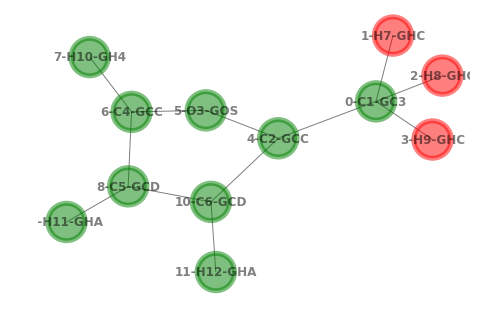

In [51]:
G, node_colors, edgecolors = _generate_graph_from_psf(psf, dummy_index=[3,2,1])
nx.draw(G, with_labels=True, font_weight='bold', edgecolors=edgecolors, node_color=node_colors, node_size=1400, alpha=0.5, font_size=12, linewidths=5)
plt.show()

In red are all the dummy atoms, in green are the real atoms.
The real-dummy atom junctions are:
- C1 : H7
- C1 : H8
- C1 : H9

## BONDS
Initially, the three hydrogen atoms have all bonds:
- C1 : H7
- C1 : H8
- C1 : H9

bonds are not modified.

## ANGLES
Angles involving dummy atoms are between:
- H7 : C1 : C2
- H7 : C1 : H8
- H7 : C1 : H9
- H8 : C1 : C2
- H8 : C1 : H9
- H8 : C1 : H7
- H9 : C1 : C2
- H9 : C1 : H8
- H9 : C1 : H7

## TORSION
Dihedrals involving dummy atoms are between:
- H7 : C1 : C2 : O3
- H7 : C1 : C2 : C6
- H8 : C1 : C2 : O3
- H8 : C1 : C2 : O6
- H9 : C1 : C2 : O3
- H9 : C1 : C2 : O6


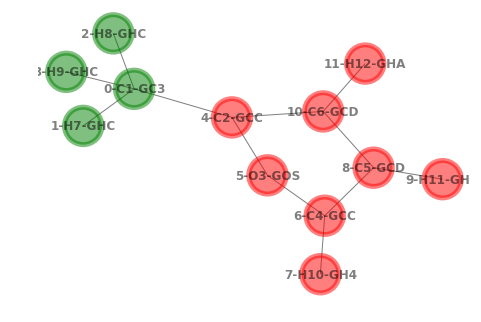

In [49]:
G, node_colors, edgecolors = _generate_graph_from_psf(psf, dummy_index=[4, 5, 6, 7, 8, 10, 11, 9])
nx.draw(G, with_labels=True, font_weight='bold', edgecolors=edgecolors, node_color=node_colors, node_size=1400, alpha=0.5, font_size=12, linewidths=5)
plt.show()

In red are all the dummy atoms, in green are the real atoms.

## Dummy atom - real atom junction

The real-dummy atom junction is:
- C1 : C2

## BONDS

Initially, there is one bond defined between real and dummy atoms:
- C1 : C2

bonds are not modified.

## ANGLES
Angles involving dummy atoms are between:
- H7 : C1 : C2
- H8 : C1 : C2
- H9 : C1 : C2
- C1 : C2 : C6
- C1 : C2 : O3

## TORSION
Dihedrals involving dummy atoms are between:
- H7 : C1 : C2 : O3
- H7 : C1 : C2 : C6
- H8 : C1 : C2 : O3
- H8 : C1 : C2 : O6
- H9 : C1 : C2 : O3
- H9 : C1 : C2 : O6
- H12: C6 : C2 : C1
- C4 : O3 : C2 : C1
